# [Lab Session 4](deconvolution.ipynb)

In [127]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

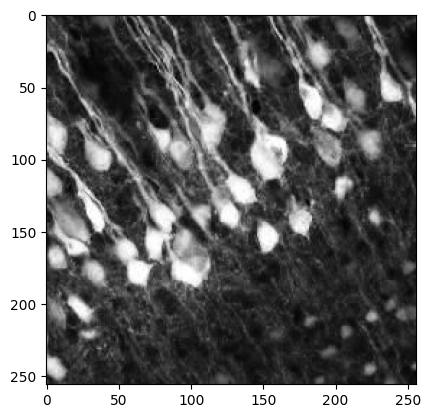

In [128]:
image6 = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(image6, 'gray');

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [129]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

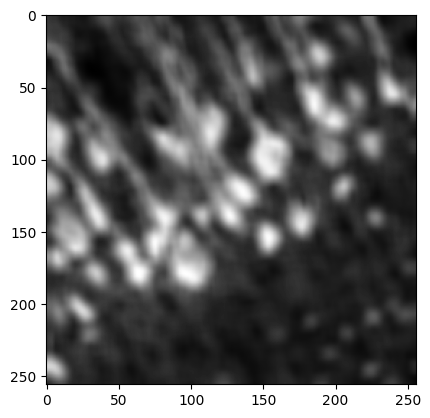

In [130]:
psf1 = conv(img, psf, mode='same', boundary='symm')
plt.imshow(psf1, cmap='gray');

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

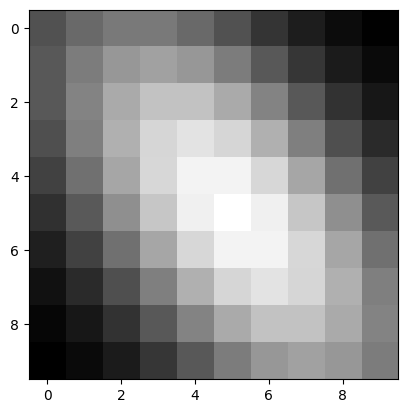

In [ ]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray');

#hell --> stärker gewichtet

Apply the second psf to the image:

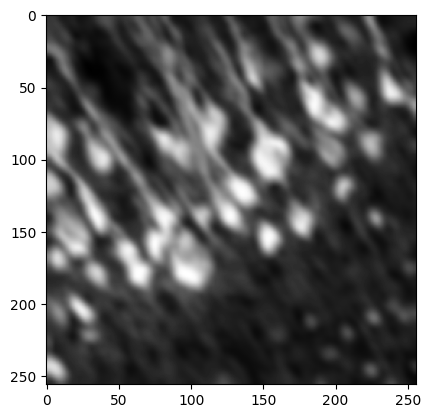

In [132]:
psf2 = conv(image6, create_psf(psf_size), mode='same', boundary='symm')
plt.imshow(psf2, cmap='gray');

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [133]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5) # entspricht h

    """
    ### Insert code here

    P = psf # das sind die variablen? die in der def vorgegebne waren
    g = image # das sind die variablen? die in der def vorgegebne waren
    P_ = np.flip(psf)
    
    for _ in range(n_iterations + 1):
        convolution1 = conv(img_deconv, P, mode='same', boundary='symm')
        division = g/convolution1
        convolution2 = conv(division, P_, mode='same', boundary='symm')
        img_deconv = image_deconv * convolution2


        img_deconv = img_deconv.clip(0,1)
    return img_deconv

   
    g = input image --> verschmiertes image
    h = deconvolved image; array same shape as image; filled with constant value 0.5 --> goal zu füllen?? --> hier ist es img_deconv
    P = PSF
    P* = flipped PSF by using np.flip 
    * conv function
    t, t+1 --> iteration
    """



    P = psf
    g = image
    P_ = np.flip(psf)
    #* = conv(g, P, mode='same', boundary='symm')
    for _ in range(n_iterations + 1): 
        convolution_ = conv(img_deconv, P, mode='same', boundary='symm')
        correction_factor = conv(g/(convolution_ +1e-8), P_, mode='same', boundary='symm')
        img_deconv = img_deconv * correction_factor

    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [186]:

richardlucy = richardson_lucy_deconvolution(psf1, psf, 2)

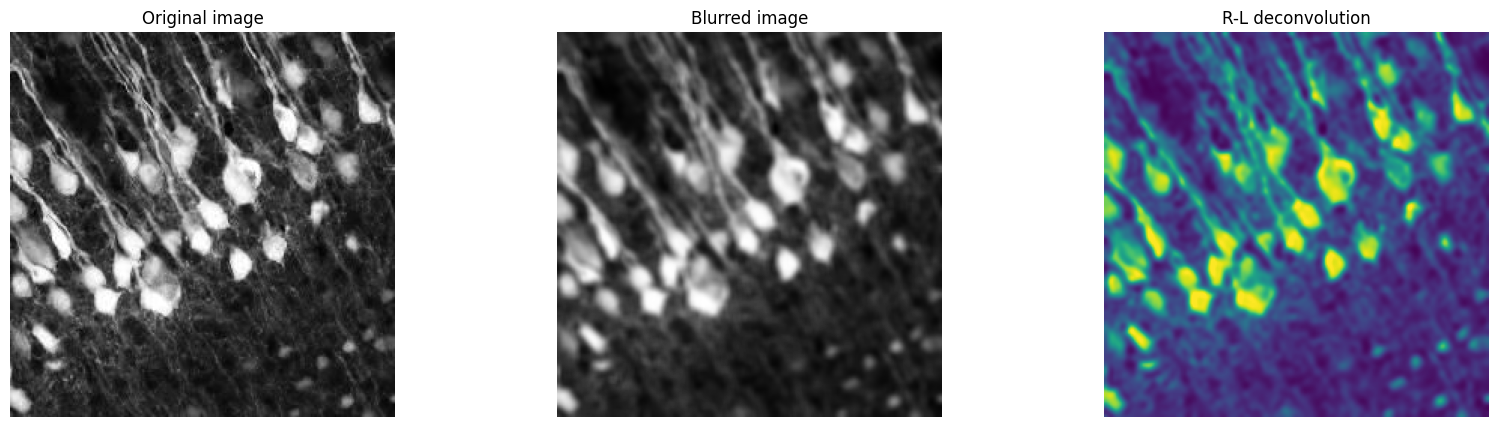

In [187]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(psf1, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, )
plt.title('R-L deconvolution')
plt.show()

1 iteration --> keine verbesserung \
1500 iterations --> kein bild mehr erkennbar, weiße pixel auf schwarzem backgroud zu sehen

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [137]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

noise_image = psf2 + noise
noise_image = noise_image.clip(0,1)

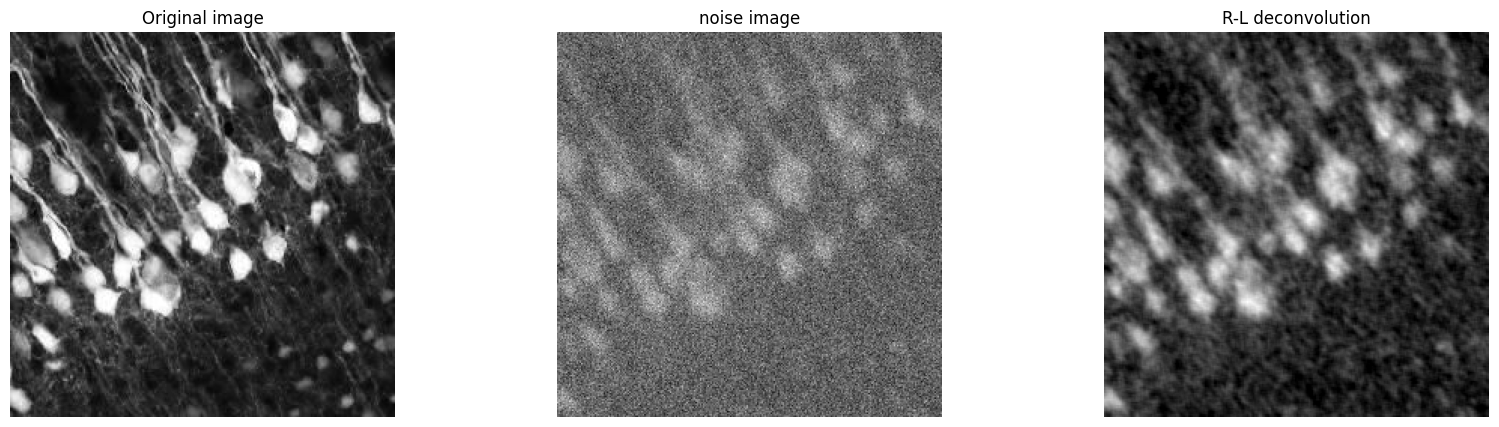

In [150]:
richardlucy = richardson_lucy_deconvolution(noise_image, create_psf(psf_size),0) 

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(noise_image, 'gray')
plt.title('noise image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

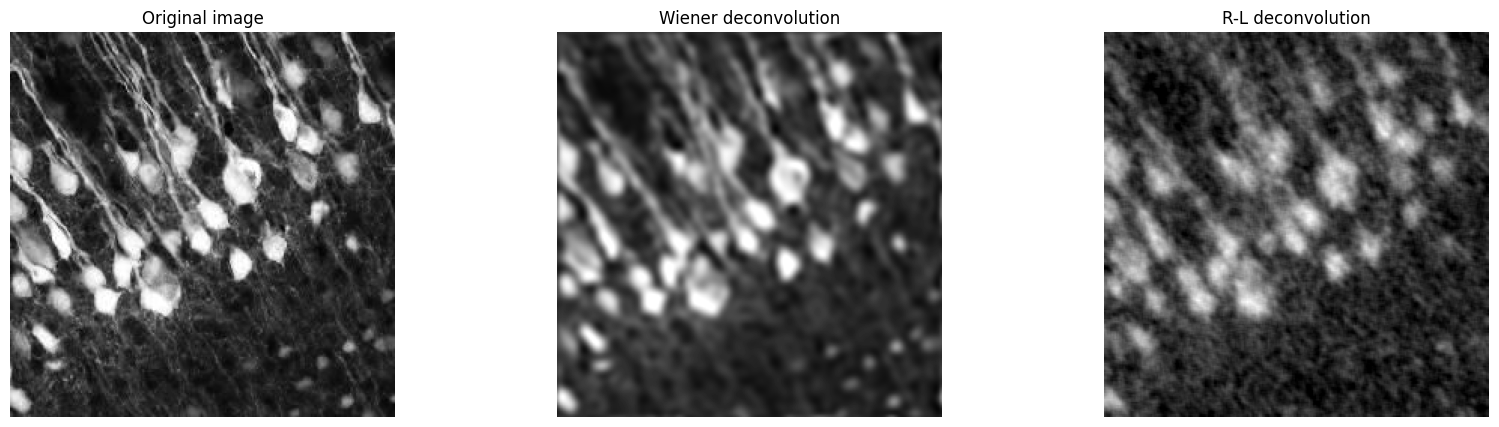

In [151]:
wd = wiener(psf1, psf, balance=2, clip=True)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(wd, 'gray')
plt.title('Wiener deconvolution')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

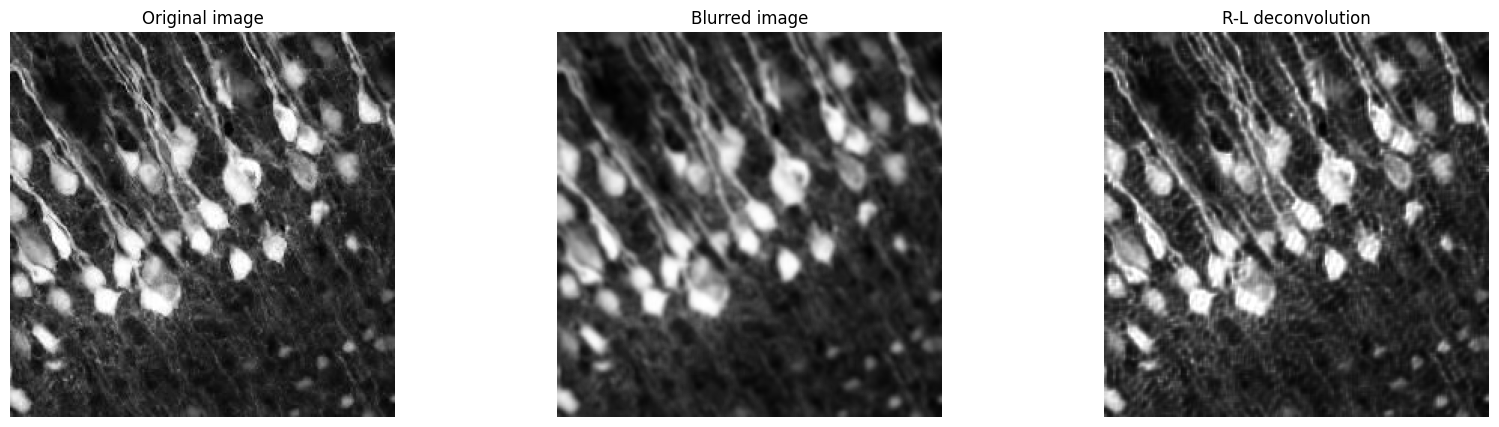

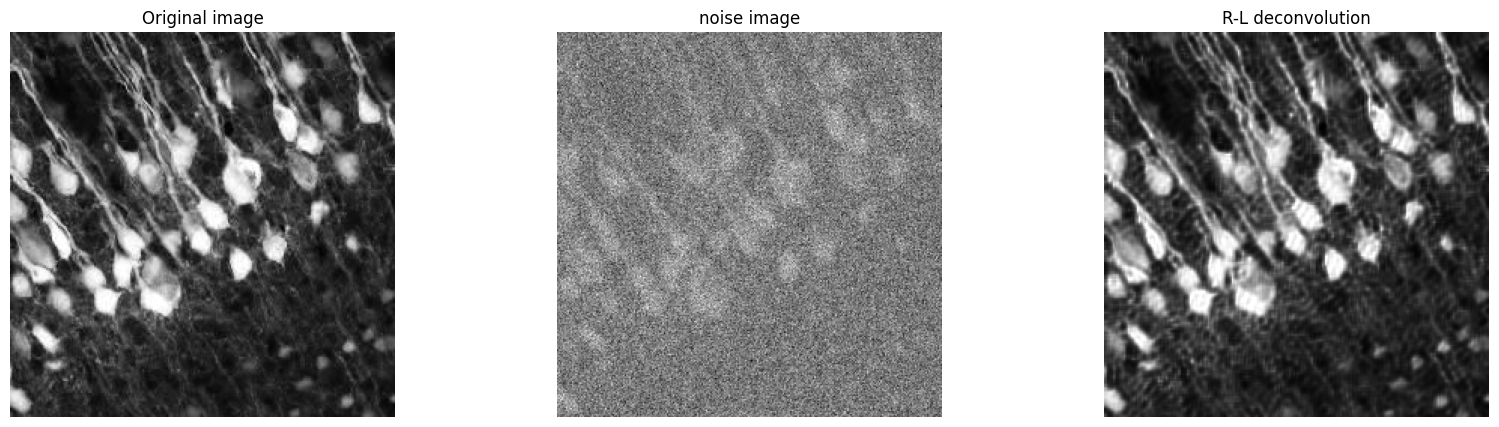

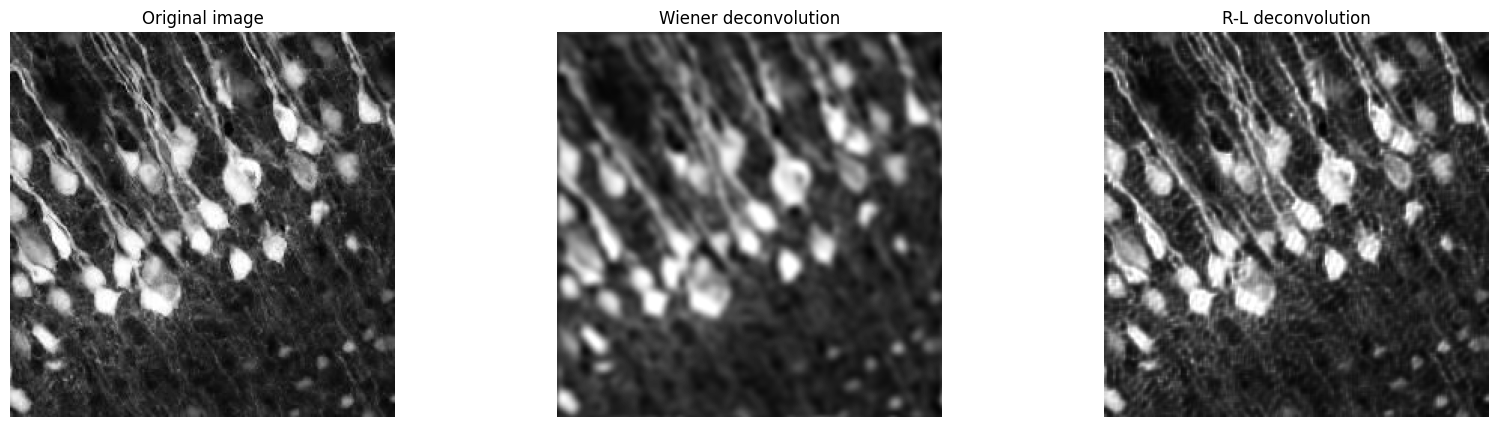

In [175]:
#smaller psf_size
psf_size = 4 # eig smaller size bei <10, aber für nr.8 wieder to 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

psf1_1 = conv(img, psf, mode='same', boundary='symm')

psf2_1 = conv(image6, create_psf(psf_size), mode='same', boundary='symm') # wenn das nicht gemuted is --> fehler: convolve2d inputs must both be 2-D arrays --> lösung: size darf nicht 1 sein oder so

# R-L

richardlucy = richardson_lucy_deconvolution(psf1_1, psf, 15)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(psf1_1, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('R-L deconvolution')
plt.show()


# noise added

noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

noise_image = psf2_1 + noise # hier ändern je nachdem ob psf2_1 def gmuted or not

richardlucy = richardson_lucy_deconvolution(psf1_1, psf, 15)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(noise_image, 'gray')
plt.title('noise image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('R-L deconvolution')
plt.show()


#wiener deconvolution

wd = wiener(psf1_1, psf, balance=2, clip=True)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(wd, 'gray')
plt.title('Wiener deconvolution')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 8.]()** Use a wrong PSF to restore the image

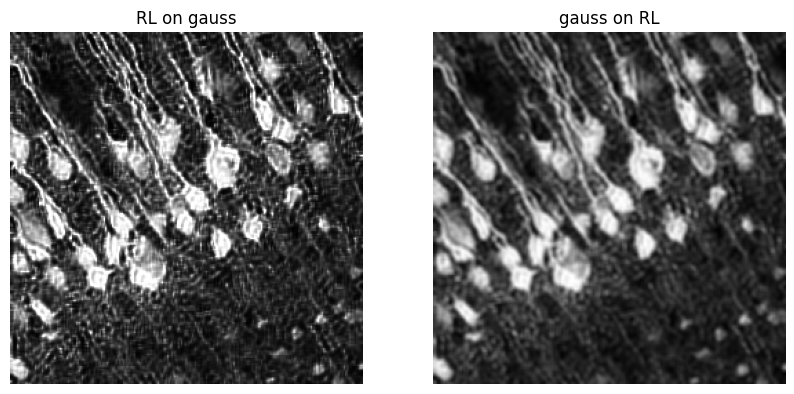

In [180]:
# RL on gauss transformed
# gauss on RL

psf__2 = conv(image6, create_psf(psf_size), mode='same', boundary='symm')
richardlucy = richardson_lucy_deconvolution(psf__2, psf, 10)

richardlucy = richardson_lucy_deconvolution(image6, psf, 10)
psf___2 = conv(richardlucy, create_psf(psf_size), mode='same', boundary='symm')


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(richardlucy, 'gray')
plt.title('RL on gauss')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(psf___2, 'gray')
plt.title('gauss on RL')
plt.show()
